In [1]:
%%capture
%load_ext autoreload
%autoreload 2
from setup_nb_env import *

from epsampling.utils import load_csv
# pd.set_option('display.float_format', lambda x: '%.3f' % x)
from epsampling.utils import drop_sers_with_nans
from epsampling.utils import date_str_to_int

DATA_DIR = '/work/users/k/4/k4thryn/Repos/EpSampling/data/'
DT = datetime.today().strftime('%Y%m%d-%H%M%S')

from IPython.display import Audio

def meow():
    display(Audio(filename='../cat_meow2.wav', autoplay=True))

In [2]:
timestamp = '20241009-144131'

fpath = os.path.join(DATA_DIR,'processed', f'processed_naive_deaths_{timestamp}.csv')
df_deaths = pd.read_csv(fpath)
# display(df)

## Drop rows with nans.
df_deaths.dropna(inplace=True)
# display(df)

## Drop samples with negative inc deaths.
df_deaths = df_deaths[df_deaths.True_inc_deaths >= 0]
# display(df_deaths)

# # # # # # # # # # # # # # # # # # # #
# # # # # # # # # # # # # # # # # # # # 

from epsampling.utils import drop_duplicate_cols

# timestamp = '20241009-143022' 

fpath = os.path.join(DATA_DIR,'processed',f'formatted_acs_results_normed_{timestamp}.csv')
df_acs = pd.read_csv(fpath,index_col='Fips')

# Remove duplicate columns
df_acs = drop_duplicate_cols(df_acs)

## Standardize
df_acs=(df_acs-df_acs.mean())/df_acs.std()

In [3]:
df = df_deaths.merge(df_acs, on='Fips')
display(df)

,Fips,State_fips,Pop,State_pop,Ratio,Date,Proj_inc_deaths,True_cum_deaths,Cum_deaths_tm1,True_inc_deaths,...,HU_OCC,POP_NH,HINS_A0018,HINS_A65p,HH_x5,POP_A3564,HU_x14,POP_16p_EMP_x7,POP_A25p,POP_x2
0,1001,1,58239.0,4997675,0.011653,20200620,83.302156,9.0,6.0,3.0,...,0.793727,0.481868,0.794219,0.318318,-0.147691,-0.134211,-0.155939,-0.148767,-0.141173,-0.140801
1,1001,1,58239.0,4997675,0.011653,20200627,68.179357,12.0,9.0,3.0,...,0.793727,0.481868,0.794219,0.318318,-0.147691,-0.134211,-0.155939,-0.148767,-0.141173,-0.140801
2,1001,1,58239.0,4997675,0.011653,20200704,76.238975,13.0,12.0,1.0,...,0.793727,0.481868,0.794219,0.318318,-0.147691,-0.134211,-0.155939,-0.148767,-0.141173,-0.140801
3,1001,1,58239.0,4997675,0.011653,20200711,88.362530,15.0,13.0,2.0,...,0.793727,0.481868,0.794219,0.318318,-0.147691,-0.134211,-0.155939,-0.148767,-0.141173,-0.140801
4,1001,1,58239.0,4997675,0.011653,20200718,114.279381,21.0,15.0,6.0,...,0.793727,0.481868,0.794219,0.318318,-0.147691,-0.134211,-0.155939,-0.148767,-0.141173,-0.140801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304412,56045,56,6891.0,576641,0.011950,20220409,8.000000,18.0,18.0,0.0,...,-0.151876,0.566402,-1.771829,0.515204,-0.306096,-0.288444,-0.313782,-0.287296,-0.292354,-0.293789
304413,56045,56,6891.0,576641,0.011950,20220416,5.000000,18.0,18.0,0.0,...,-0.151876,0.566402,-1.771829,0.515204,-0.306096,-0.288444,-0.313782,-0.287296,-0.292354,-0.293789
304414,56045,56,6891.0,576641,0.011950,20220423,4.000000,18.0,18.0,0.0,...,-0.151876,0.566402,-1.771829,0.515204,-0.306096,-0.288444,-0.313782,-0.287296,-0.292354,-0.293789
304415,56045,56,6891.0,576641,0.011950,20220430,4.000000,18.0,18.0,0.0,...,-0.151876,0.566402,-1.771829,0.515204,-0.306096,-0.288444,-0.313782,-0.287296,-0.292354,-0.293789


In [4]:
df['Target'] = df.apply(lambda x: (x.True_inc_deaths+(1/100000)) / x.Pop * 100000, axis=1)
df['Naive'] = df.apply(lambda x: (x.Naive_inc_deaths+(1/100000)) / x.Pop * 100000, axis=1)
## change to (number of counties in state) instead of (1) ?
df['State'] = df.apply(lambda x: (x.Proj_inc_deaths+(1/100000)) / x.State_pop * 100000, axis=1)
df['Cumtm1'] = df.apply(lambda x: (x.Cum_deaths_tm1+(1/100000)) / x.Pop * 100000, axis=1)


# df['Target'] = df.apply(lambda x: (x.True_inc_deaths+(1)) / x.Pop * 100000, axis=1)
# df['Naive'] = df.apply(lambda x: (x.Naive_inc_deaths+(1)) / x.Pop * 100000, axis=1)
# df['State'] = df.apply(lambda x: (x.Proj_inc_deaths+(1)) / x.State_pop * 100000, axis=1)
# df['Cumtm1'] = df.apply(lambda x: (x.Cum_deaths_tm1+(1)) / x.Pop * 100000, axis=1)


# df['Target'] = df.apply(lambda x: x.True_inc_deaths / x.Pop * 100000, axis=1)
# df['Naive'] = df.apply(lambda x: x.Naive_inc_deaths / x.Pop * 100000, axis=1)
# df['State'] = df.apply(lambda x: x.Proj_inc_deaths / x.State_pop * 100000, axis=1)
# df['Cumtm1'] = df.apply(lambda x: x.Cum_deaths_tm1 / x.Pop * 100000, axis=1)

In [5]:
df['Target'].describe()

count    3.044170e+05
mean     3.775459e+00
std      9.473611e+00
min      2.289804e-07
25%      6.358492e-05
50%      5.913661e-04
75%      4.461818e+00
max      1.204831e+03
Name: Target, dtype: float64

In [6]:
from epsampling.utils import get_chunks

chunks = get_chunks(list(df.Date.unique()), 4)
    
idx = 18 #10

dates_test = chunks[idx]
dates_train = [x for x in df.Date.unique() if x not in dates_test]

df_train = df[df.Date.isin(dates_train)]
df_test = df[df.Date.isin(dates_test)]

feats = list(df_acs.columns) + ['State','Cumtm1','Naive',
                               'State_pop','Ratio','Pop']
# print(feats)

X_train = df_train[feats]
X_test = df_test[feats]

y_train = df_train['Target']
y_test = df_test['Target']

y_naive = df_test['Naive']

In [7]:
X_train

,POP_NHPINH,POP_NHPI,POP_AIANNH,POP_AIAN,IND_AFFHM_MQE,HU_UIS02,HU_OCC_OPRgt200,IND_PSMAW_M,OCC_MBSA_ELCAM_L,OCC_SERV_PS_LE,...,HU_x14,POP_16p_EMP_x7,POP_A25p,POP_x2,State,Cumtm1,Naive,State_pop,Ratio,Pop
0,-0.177905,-0.187041,-0.202380,-0.221716,-0.375706,-1.034597,0.369659,1.126266,-0.632006,-0.888905,...,-0.155939,-0.148767,-0.141173,-0.140801,1.666818,10.302392,1.666835,4997675,0.011653,58239.0
1,-0.177905,-0.187041,-0.202380,-0.221716,-0.375706,-1.034597,0.369659,1.126266,-0.632006,-0.888905,...,-0.155939,-0.148767,-0.141173,-0.140801,1.364222,15.453579,1.364239,4997675,0.011653,58239.0
2,-0.177905,-0.187041,-0.202380,-0.221716,-0.375706,-1.034597,0.369659,1.126266,-0.632006,-0.888905,...,-0.155939,-0.148767,-0.141173,-0.140801,1.525489,20.604767,1.525506,4997675,0.011653,58239.0
3,-0.177905,-0.187041,-0.202380,-0.221716,-0.375706,-1.034597,0.369659,1.126266,-0.632006,-0.888905,...,-0.155939,-0.148767,-0.141173,-0.140801,1.768073,22.321829,1.768090,4997675,0.011653,58239.0
4,-0.177905,-0.187041,-0.202380,-0.221716,-0.375706,-1.034597,0.369659,1.126266,-0.632006,-0.888905,...,-0.155939,-0.148767,-0.141173,-0.140801,2.286651,25.755954,2.286668,4997675,0.011653,58239.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304412,1.830725,1.823715,-0.033052,-0.052614,5.625115,0.195484,-0.488658,-0.525724,-0.410556,0.356878,...,-0.313782,-0.287296,-0.292354,-0.293789,1.387347,261.210419,1.387490,576641,0.011950,6891.0
304413,1.830725,1.823715,-0.033052,-0.052614,5.625115,0.195484,-0.488658,-0.525724,-0.410556,0.356878,...,-0.313782,-0.287296,-0.292354,-0.293789,0.867092,261.210419,0.867236,576641,0.011950,6891.0
304414,1.830725,1.823715,-0.033052,-0.052614,5.625115,0.195484,-0.488658,-0.525724,-0.410556,0.356878,...,-0.313782,-0.287296,-0.292354,-0.293789,0.693674,261.210419,0.693818,576641,0.011950,6891.0
304415,1.830725,1.823715,-0.033052,-0.052614,5.625115,0.195484,-0.488658,-0.525724,-0.410556,0.356878,...,-0.313782,-0.287296,-0.292354,-0.293789,0.693674,261.210419,0.693818,576641,0.011950,6891.0


In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [9]:
coef = abs(reg.coef_)
# print(coef, abs(coef))
# print(coef)

# print(sorted(coef, reverse=True))
ind = np.argpartition(coef, -6)[-6:]
top = coef[ind]

# print(ind,top)
X_train.iloc[:, ind]

,POP_ASIANNH,POP_BLACKNH,POP_WHITENH,POP_AIANNH,POP_HISP_x12,POP_NH
0,-0.088855,0.754160,-0.119001,-0.202380,-0.481868,0.481868
1,-0.088855,0.754160,-0.119001,-0.202380,-0.481868,0.481868
2,-0.088855,0.754160,-0.119001,-0.202380,-0.481868,0.481868
3,-0.088855,0.754160,-0.119001,-0.202380,-0.481868,0.481868
4,-0.088855,0.754160,-0.119001,-0.202380,-0.481868,0.481868
...,...,...,...,...,...,...
304412,-0.220931,-0.592176,0.632355,-0.033052,-0.566402,0.566402
304413,-0.220931,-0.592176,0.632355,-0.033052,-0.566402,0.566402
304414,-0.220931,-0.592176,0.632355,-0.033052,-0.566402,0.566402
304415,-0.220931,-0.592176,0.632355,-0.033052,-0.566402,0.566402


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from sktime.performance_metrics.forecasting import mean_relative_absolute_error
from sktime.performance_metrics.forecasting import median_relative_absolute_error

def get_performance(model_names, model_preds, y_test, y_naive):
    
    metrics_dict = {'MAE': mean_absolute_error,
                    'MedAE': median_absolute_error,
                    'MSE': mean_squared_error,
                    'RMSE': mean_squared_error,
                    'r2': r2_score,
                    'relMAE': mean_relative_absolute_error,
                    'relMedAE': median_relative_absolute_error}

    model_res_dict = {model:{} for model in model_names}
    
    for model,pred in zip(model_names, model_preds):
        for metric, func in metrics_dict.items():
            if metric=='relMAE':
                model_res_dict[model][metric] = func(y_test, pred, y_pred_benchmark=y_naive)
            elif metric=='relMedAE':
                model_res_dict[model][metric] = func(y_test, pred, y_pred_benchmark=y_naive)
            elif metric=='RMSE':
                model_res_dict[model][metric] = func(y_test, pred, squared=False)
            else:
                model_res_dict[model][metric] = func(y_test, pred)
            
    return model_res_dict


y_pred = reg.predict(X_test)
y_naive = df_test['Naive']

model_names = ['Deaths_pred', 'Deaths_naive']
model_preds = [y_pred, y_naive]

metrics_dict = get_performance(model_names, model_preds, y_test, y_naive)
metrics_dict

{'Deaths_pred': {'MAE': 4.857670319517107,
  'MedAE': 2.97416012290752,
  'MSE': 161.40991763227478,
  'RMSE': 12.704720289415064,
  'r2': 0.017012937451276855,
  'relMAE': 1.9591078030961568,
  'relMedAE': 1.1667348807790399},
 'Deaths_naive': {'MAE': 4.650093902653675,
  'MedAE': 2.203455838644989,
  'MSE': 166.893614405985,
  'RMSE': 12.918731145355762,
  'r2': -0.01638279846488766,
  'relMAE': 1.0,
  'relMedAE': 1.0}}

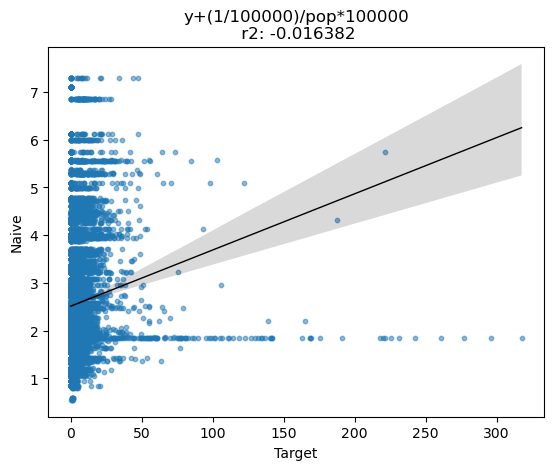

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

x = df_test['Target']
y = y_naive

df_test['Naive prediction'] = y_naive

# sns.scatterplot(data=df_test, x="Target", y="Prediction", s=10)
# plt.show()


import seaborn as sns 
import matplotlib.pyplot as plt

sns.regplot(data=df_test, x="Target", y="Naive", 
            scatter_kws={'s':10, 'alpha':0.5}, 
            line_kws={'color':'k','linewidth':1},logx=False)
plt.title('y+(1/100000)/pop*100000\n r2: -0.016382') 
# plt.title('y+(1)/pop*100000\n r2: 0.934336') 
# plt.title('y/pop*100000\n r2: -0.016382') 

plt.show()

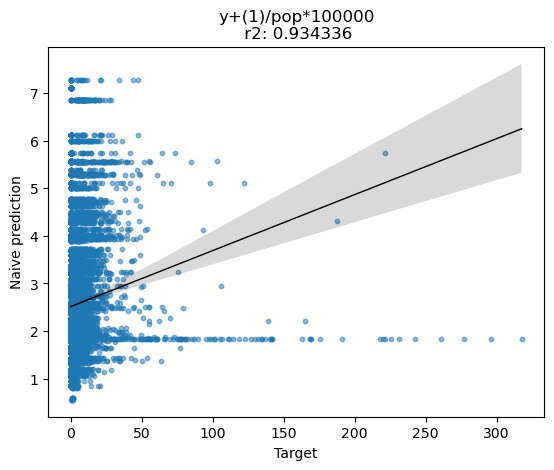

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


dff_test = df_test[df_test.Target<500]
dff_test['Naive prediction'] = dff_test['Naive']

sns.regplot(data=dff_test, x="Target", y="Naive prediction", 
            scatter_kws={'s':10, 'alpha':0.5}, line_kws={'color':'k','linewidth':1})
# plt.title('y+(1/100000)/pop*100000\n r2: -0.016382') 
plt.title('y+(1)/pop*100000\n r2: 0.934336') 
# plt.title('y/pop*100000\n r2: -0.016382') 

plt.show()